<a href="https://colab.research.google.com/github/ramandjy/ML/blob/main/fakenews_rama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded and cleaned successfully.
Model Accuracy: 87.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       759
           1       0.88      0.90      0.89       865

    accuracy                           0.88      1624
   macro avg       0.88      0.88      0.88      1624
weighted avg       0.88      0.88      0.88      1624



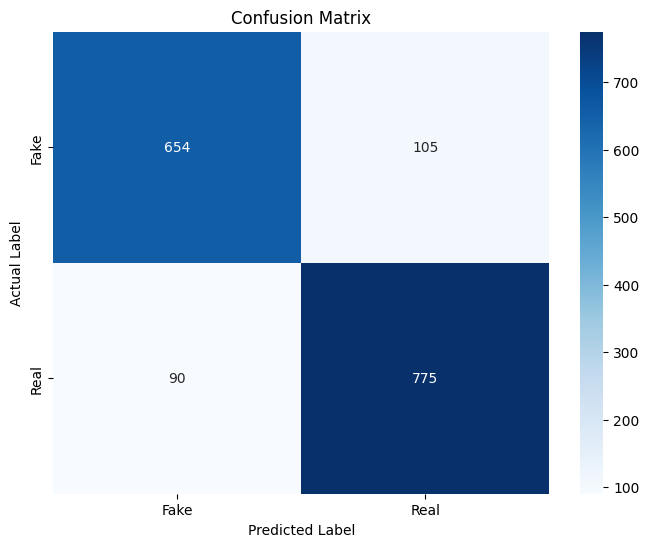

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Kelas untuk Fake News Detector
class FakeNewsDetector:
    def __init__(self):
        # RandomForestClassifier
        self.vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
        self.classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    def prepare_data(self, dataset):
        #  kolom 'title' untuk teks dan 'label' untuk target
        X = dataset['title']
        y = dataset['label']
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train_classifier(self, X_train, y_train):
        # teks menjadi fitur numerik
        X_train_vectorized = self.vectorizer.fit_transform(X_train)
        # Latih model RandomForestClassifier
        self.classifier.fit(X_train_vectorized, y_train)

    def evaluate_model(self, X_test, y_test):
        # Transformasi data uji
        X_test_vectorized = self.vectorizer.transform(X_test)
        predictions = self.classifier.predict(X_test_vectorized)

        # Evaluasi performa model
        accuracy = accuracy_score(y_test, predictions)
        print(f"Model Accuracy: {accuracy * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test, predictions))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, predictions, labels=[0, 1])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()
        return predictions

# Path dataset
dataset_path = '/content/drive/MyDrive/AI/test.csv'

# Load dan bersihkan dataset
try:
    # Membaca dataset dengan delimiter yang benar
    data = pd.read_csv(dataset_path, sep=';')
    # Hapus kolom yang tidak relevan
    data = data.drop(columns=["Unnamed: 0"], errors='ignore')
    print("Dataset loaded and cleaned successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Inisialisasi detektor berita palsu
detector = FakeNewsDetector()

# Membagi data menjadi train-test split
X_train, X_test, y_train, y_test = detector.prepare_data(data)

# Melatih model
detector.train_classifier(X_train, y_train)

# Evaluasi model
predictions = detector.evaluate_model(X_test, y_test)


Random Forest

Dataset loaded successfully.
   Unnamed: 0                                              title  \
0           0  Live from New York, it's a Trump-Clinton remat...   
1           1  Catalan separatists to lose majority in tight ...   
2           2  North Carolina governor concedes election to D...   
3           3  Draft Senate Iran legislation sets tough new U...   
4           4  California governor taps U.S. Representative B...   

                                                text  label  
0  NEW YORK (Reuters) - Veteran actor and frequen...      1  
1  BARCELONA (Reuters) - Catalonia s independence...      1  
2  WINSTON-SALEM, N.C. (Reuters) - North Carolina...      1  
3  WASHINGTON (Reuters) - Draft legislation respo...      1  
4  SACRAMENTO, Calif. (Reuters) - California Gove...      1  
Model Accuracy: 48.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.99      0.64       759
           1       0.89      0.05 

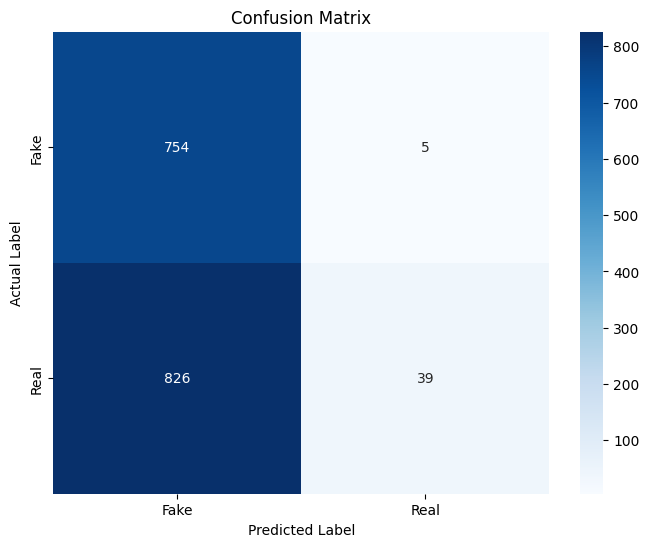

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class FakeNewsDetectorKNN:
    def __init__(self):
        # Inisialisasi TfidfVectorizer dan KNeighborsClassifier
        self.vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
        self.classifier = KNeighborsClassifier(n_neighbors=3)  # bebas k berapa

    def prepare_data(self, dataset):
        # Ekstrak teks dan label dari dataset
        X = dataset['title']  # Mengasumsikan kolom teks adalah 'title'
        y = dataset['label']  # Mengasumsikan kolom label adalah 'label'

        # Membagi data menjadi train-test split (80:20)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

    def train_classifier(self, X_train, y_train):
        # Menggunakan TfidfVectorizer untuk mengubah teks menjadi representasi numerik
        X_train_vectorized = self.vectorizer.fit_transform(X_train)
        # Latih model KNN
        self.classifier.fit(X_train_vectorized, y_train)

    def evaluate_model(self, X_test, y_test):
        # Transformasikan data uji menggunakan TfidfVectorizer
        X_test_vectorized = self.vectorizer.transform(X_test)
        # Prediksi label untuk data uji
        predictions = self.classifier.predict(X_test_vectorized)

        # Menghitung akurasi model
        accuracy = accuracy_score(y_test, predictions)
        print(f"Model Accuracy: {accuracy * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test, predictions))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, predictions)  # Removed 'labels' argument
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

        return predictions

# Coba membaca dataset dengan pengaturan untuk menangani kesalahan
dataset_path = '/content/drive/MyDrive/AI/test.csv'

try:
    # Menggunakan on_bad_lines='skip' untuk melewati baris yang bermasalah
    data = pd.read_csv(dataset_path, on_bad_lines='skip', delimiter=';')  # Changed to on_bad_lines='skip'
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Tampilkan beberapa data untuk memastikan dataset terbaca dengan benar
print(data.head())

# Inisialisasi detektor berita palsu dengan KNN
detector_knn = FakeNewsDetectorKNN()

# Bagi dataset menjadi train-test split
X_train, X_test, y_train, y_test = detector_knn.prepare_data(data)

# Latih model menggunakan KNN
detector_knn.train_classifier(X_train, y_train)

# Evaluasi model
predictions = detector_knn.evaluate_model(X_test, y_test)


KNN